In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('admission.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Finding the missing values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Q.1 Perform Exploratory Data Analysis (EDA) tasks 
a) Visualize the 10 random rows of the data set.\
b) Generate the description for numeric variables.\
c) Check the shape of the data set.\
d) Generate the correlation matrix.\
e) Generate a correlogram.

### a) Visualize the 10 random rows of the data set.

In [7]:
df.sample(n = 10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
234,235,330,113,5,5.0,4.0,9.31,1,0.91
288,289,314,104,4,5.0,5.0,9.02,0,0.82
165,166,322,110,5,4.5,4.0,8.97,0,0.78
29,30,310,99,2,1.5,2.0,7.30,0,0.54
467,468,318,101,5,3.5,5.0,8.78,1,0.78
86,87,315,106,3,4.5,3.5,8.42,0,0.72
353,354,300,102,3,3.5,2.5,8.17,0,0.63
447,448,320,108,3,3.5,5.0,8.97,1,0.84
138,139,326,116,2,4.5,3.0,9.08,1,0.80
399,400,333,117,4,5.0,4.0,9.66,1,0.95


### b) Generate the description for numeric variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df[df.select_dtypes(include=[np.number]).columns ] 

<IPython.core.display.Javascript object>

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### c) Check the shape of the data set.

In [11]:
df.shape

(500, 9)

### d) Generate the correlation matrix.

In [12]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


### e) Generate a correlogram.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

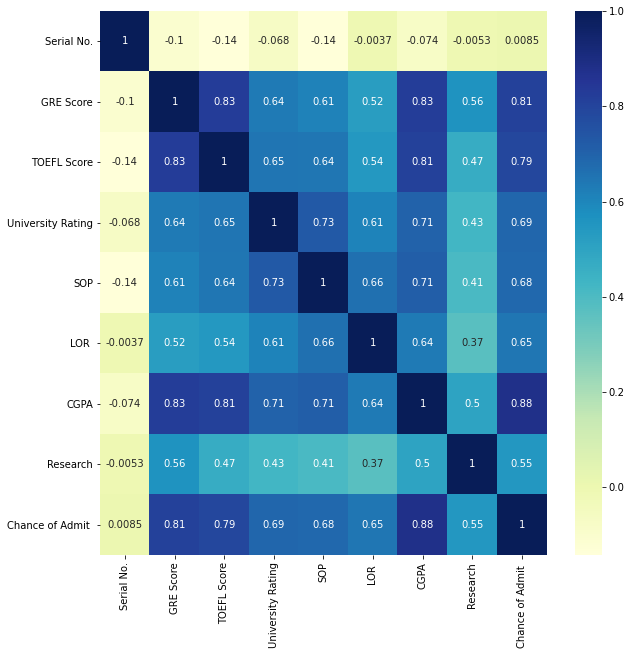

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() ,cmap="YlGnBu",annot= True )

# Q.2 Find out the minimum and maximum values for GRE score

In [14]:
df.rename(columns={'Serial No.': 'Serial_No',
                   'GRE Score': 'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [15]:
df.GRE_Score.max()

340

In [16]:
df.GRE_Score.min()

290

In [17]:
print("Maximum Score of GRE:",max(df['GRE_Score']))
print("Minimum Score of GRE:",min(df['GRE_Score']))

Maximum Score of GRE: 340
Minimum Score of GRE: 290


# Q.3 Find out the percentage of universities for each university rating

In [18]:
CGPA_PER = (df.CGPA)*9.5

In [19]:
CGPA_PER.head()

0    91.675
1    84.265
2    76.000
3    82.365
4    77.995
Name: CGPA, dtype: float64

In [20]:
df['CGPA'].groupby(df['University_Rating']).max()

University_Rating
1    9.12
2    9.36
3    9.32
4    9.92
5    9.91
Name: CGPA, dtype: float64

# Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,
such that :\
Students having the “Chance of Admit” value > 0.80, are assigned value 1, and\
Students having the “Chance of Admit” value < 0.80, are assigned value 0\
Where 0: Low chance of Admission and 1: High chance of admission

In [21]:
df.loc[(df['Chance_of_Admit']>=0.80),'Chance_of_Admit']=1

df.loc[(df['Chance_of_Admit']<0.80),'Chance_of_Admit']=0

In [22]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


# Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

##### Sampling

In [23]:
X = df.drop(['Chance_of_Admit'],axis=1)
y = df['Chance_of_Admit']

##### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=100)

### Logestic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred_lr = lr.predict(X_test)

In [28]:
print('Accuracy by using Logestic Regression',metrics.accuracy_score(y_test,y_pred_lr))
print('Precision by using Logestic Regression',metrics.precision_score(y_test,y_pred_lr))
print('Recall by using Logestic Regression',metrics.recall_score(y_test,y_pred_lr))

<IPython.core.display.Javascript object>

Accuracy by using Logestic Regression 0.9


<IPython.core.display.Javascript object>

Precision by using Logestic Regression 0.8857142857142857


<IPython.core.display.Javascript object>

Recall by using Logestic Regression 0.8378378378378378


### Decision Tree Classifier

In [29]:
from sklearn import tree

In [30]:
dt = tree.DecisionTreeClassifier() # create model object

In [31]:
X_train.shape

(400, 8)

In [32]:
y_train.dtype

dtype('float64')

In [33]:
dt.fit(X_train,y_train)  ### "MODEL CREATED"

DecisionTreeClassifier()

In [34]:
y_pred_dt = dt.predict(X_test)   ### "PREDICTION"
y_pred_dt

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

In [35]:
print('Accuracy by using Decision Tree Classifier',metrics.accuracy_score(y_test,y_pred_dt))
print('Precision by using Decision Tree Classifier',metrics.precision_score(y_test,y_pred_dt))
print('Recall by using Decision Tree Classifier',metrics.recall_score(y_test,y_pred_dt))

<IPython.core.display.Javascript object>

Accuracy by using Decision Tree Classifier 0.86


<IPython.core.display.Javascript object>

Precision by using Decision Tree Classifier 0.7948717948717948


<IPython.core.display.Javascript object>

Recall by using Decision Tree Classifier 0.8378378378378378


### Plotting Tree

In [36]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Hyperparameter tuning

In [37]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
### create function to genearte model report


def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [39]:
### specify parameters and distribution to sample from


param_dist={'max_depth':[3,None],        
           'max_features': sp_randint(1,11), 
           'min_samples_split':sp_randint(2,11), 
           'criterion':['gini','entropy']}  

In [40]:
### run randomized search


n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [41]:
start=time()
random_search.fit(X_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.81 seconds for 20 candidatesparameter settings.


<IPython.core.display.Javascript object>

Model with rank: 1
Mean validation score:  0.903 (std: 0.022)
parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 6}

Model with rank: 1
Mean validation score:  0.903 (std: 0.035)
parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 10}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model with rank: 3
Mean validation score:  0.900 (std: 0.029)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 7}



In [42]:
random_search.cv_results_

{'mean_fit_time': array([0.00625319, 0.00625615, 0.00937705, 0.00755811, 0.00625844,
        0.        , 0.        , 0.        , 0.0062499 , 0.00756049,
        0.00625014, 0.00624881, 0.00755515, 0.00625525, 0.003126  ,
        0.00312519, 0.00757031, 0.00364804, 0.00405726, 0.00447025]),
 'std_fit_time': array([0.00765857, 0.00766219, 0.00765633, 0.00700337, 0.00766501,
        0.        , 0.        , 0.        , 0.00765454, 0.00701174,
        0.00765483, 0.0076532 , 0.00700819, 0.00766108, 0.006252  ,
        0.00625038, 0.00700313, 0.00451469, 0.00424626, 0.00469641]),
 'mean_score_time': array([0.00312433, 0.00130415, 0.        , 0.        , 0.        ,
        0.00624938, 0.00443225, 0.00312586, 0.        , 0.        ,
        0.00312452, 0.        , 0.        , 0.00311937, 0.0075593 ,
        0.        , 0.00041203, 0.00364008, 0.00202675, 0.        ]),
 'std_score_time': array([0.00624866, 0.0026083 , 0.        , 0.        , 0.        ,
        0.0076539 , 0.00614632, 0.006251

In [43]:
### usefull grid of mentioned parameter


param_grid={'max_depth':[3,None],       
           'max_features': [1,3,10], 
           'min_samples_split':[2,3,10], 
           'criterion':['gini','entropy']} 

In [44]:
### Run grid serach


grid_search = GridSearchCV(dt,param_grid = param_grid, cv = 5)

In [45]:
start = time()
grid_search.fit(X_train,y_train)
print('gridsearchCV search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),len(grid_search.cv_results_['params'])))
report(random_search.cv_results_)

gridsearchCV search too 1.31 seconds for 36 candidatesparameter settings.


<IPython.core.display.Javascript object>

Model with rank: 1
Mean validation score:  0.903 (std: 0.022)
parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 6}

Model with rank: 1
Mean validation score:  0.903 (std: 0.035)
parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 10}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model with rank: 3
Mean validation score:  0.900 (std: 0.029)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 7}



In [46]:
parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 4}

In [47]:
dt_grid_search = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = 3, min_samples_split = 8)

In [48]:
dt_grid_search.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_split=8)

In [49]:
y_pred_gs = dt_grid_search.predict(X_test)

In [50]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))
print('Precision',metrics.precision_score(y_test,y_pred_gs))
print('Recall',metrics.recall_score(y_test,y_pred_gs))

<IPython.core.display.Javascript object>

Accuracy 0.92


<IPython.core.display.Javascript object>

Precision 0.9142857142857143


<IPython.core.display.Javascript object>

Recall 0.8648648648648649


### Plotting Tree

In [51]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt_grid_search,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Q.6 Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = rf.predict(X_test)

In [56]:
rf.feature_importances_

array([0.05977013, 0.18324057, 0.18569891, 0.09320811, 0.07485573,
       0.04827809, 0.30101925, 0.0539292 ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

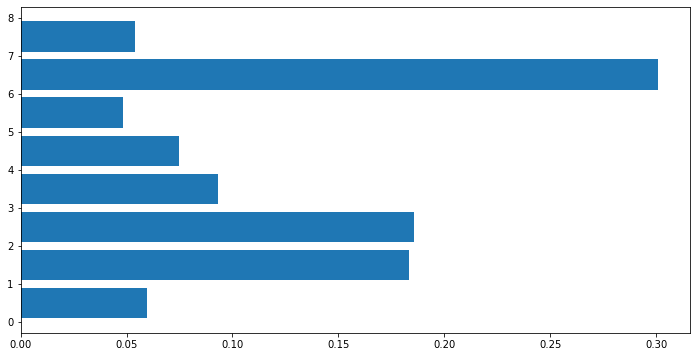

In [57]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance, align='center')
plt.show

In [58]:
print('Accuracy by using RF:', metrics.accuracy_score(y_test,y_pred_rf))
print('Precision by using RF:', metrics.precision_score(y_test,y_pred_rf))
print('Recall by using RF:', metrics.recall_score(y_test, y_pred_rf))

<IPython.core.display.Javascript object>

Accuracy by using RF: 0.94


<IPython.core.display.Javascript object>

Precision by using RF: 0.918918918918919


<IPython.core.display.Javascript object>

Recall by using RF: 0.918918918918919


# Q.7 Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.

 ### Gradient Boosting

In [59]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
clf= GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=1, random_state=0).fit(X_train,y_train)

In [61]:
y_pred_gb=clf.predict(X_test)

In [62]:
clf.score(X_train,y_train)

0.9275

In [63]:
clf.score(X_test,y_test)

0.92

In [64]:
print('Accuracy using gb:', metrics.accuracy_score(y_test,y_pred_gb))
print('Precision using gb:', metrics.precision_score(y_test,y_pred_gb))
print('Recall using gb:', metrics.recall_score(y_test, y_pred_gb))

<IPython.core.display.Javascript object>

Accuracy using gb: 0.92


<IPython.core.display.Javascript object>

Precision using gb: 0.9393939393939394


<IPython.core.display.Javascript object>

Recall using gb: 0.8378378378378378


### Adaboost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
clf_ab = AdaBoostClassifier (n_estimators = 100, random_state=0)

In [67]:
clf_ab.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [68]:
y_pred_ab=clf.predict(X_test)

In [69]:
print('Accuracy using Ab :', metrics.accuracy_score(y_test,y_pred_ab))
print('Precision using Ab :', metrics.precision_score(y_test,y_pred_ab))
print('Recall using Ab :', metrics.recall_score(y_test, y_pred_ab))

<IPython.core.display.Javascript object>

Accuracy using Ab : 0.92


<IPython.core.display.Javascript object>

Precision using Ab : 0.9393939393939394


<IPython.core.display.Javascript object>

Recall using Ab : 0.8378378378378378


# Q.8 Compare all of the models and justify your choice about the optimum model.

In [70]:
comparison = pd.DataFrame({'Algorithm' : ['Logistic_Regression','Decision_tree', 'Hyperparameter_Tuning' , 'Random_Forest' ,'Gradient_Boosting', 'Adaboost'] , 
                        'Accuracy' :  [metrics.accuracy_score(y_test,y_pred_lr) ,metrics.accuracy_score(y_test,y_pred_dt) ,metrics.accuracy_score(y_test,y_pred_gs), 
                                          metrics.accuracy_score(y_test,y_pred_rf) , metrics.accuracy_score(y_test,y_pred_gb),metrics.accuracy_score(y_test,y_pred_ab)]})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
comparison

,Algorithm,Accuracy
0,Logistic_Regression,0.90
1,Decision_tree,0.86
2,Hyperparameter_Tuning,0.92
3,Random_Forest,0.94
4,Gradient_Boosting,0.92
5,Adaboost,0.92


# Justification:

From the above Data Frame we get the accuracy for 
each alogorithm that is used.\
So it is clear that 
the accuracy for Random Forest algorithm comes out to be highest.
Accuracy for Random Forest is alomost 94% .

